In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import signal

waveform = pd.read_csv(r'water_package\data_3\data_20250402_165105_763362.csv')['value'].to_numpy() * 3.3 / 4095
waveform -= np.median(waveform)
t = np.linspace(0, 0.0126, len(waveform), endpoint=False)
fs = 1 / (t[1] - t[0])

In [16]:
def trans(value, fmt_expression=lambda x: f'{x:.4f}'):
    u = ['', 'k', 'M', 'G', 'T', 'P', 'E', 'Z', 'Y']
    count = 0
    while value >= 1000:
        value /= 1000
        count += 1
    
    str_ = int(value) if value.is_integer() else fmt_expression(value)
    return f'{str_} {u[count]}'

0.504


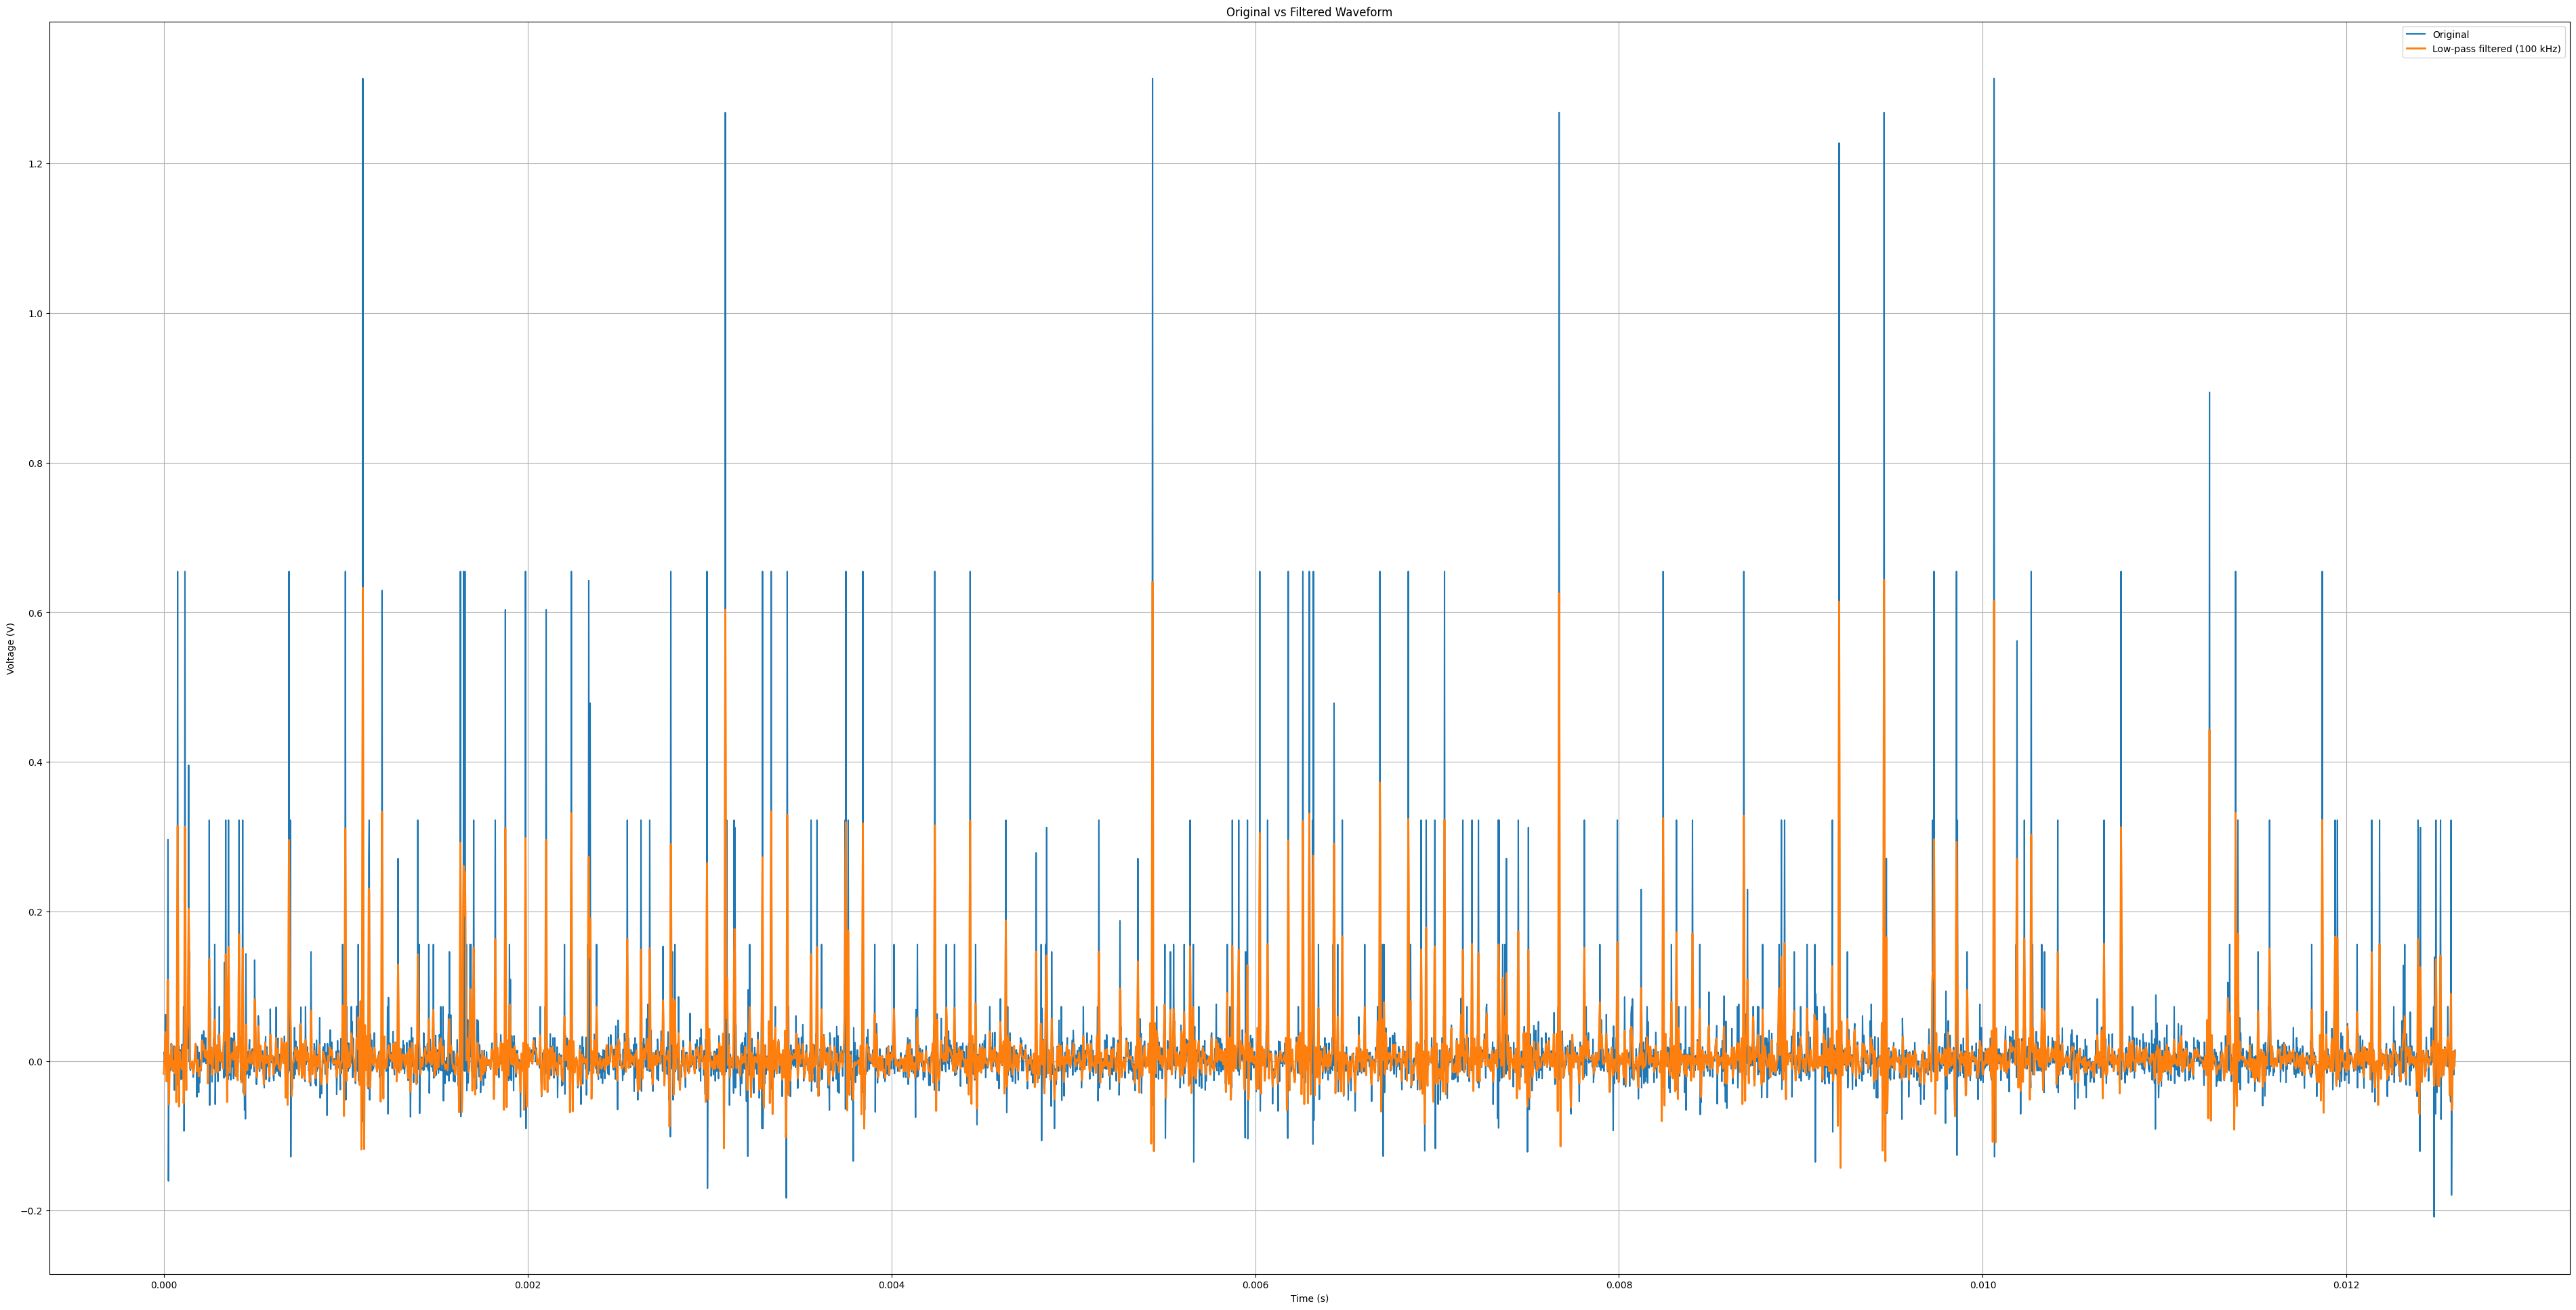

In [17]:
# Design 4th order Butterworth low-pass filter
cutoff_freq = 100000
nyquist = 0.5 * fs
normal_cutoff = cutoff_freq / nyquist
print(normal_cutoff)
b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)

# Apply the filter to the waveform
filtered_waveform = signal.filtfilt(b, a, waveform)

# Plot both original and filtered waveforms
plt.figure(figsize=(48, 24))
plt.plot(t, waveform, label='Original')
plt.plot(t, filtered_waveform, label=f'Low-pass filtered ({trans(cutoff_freq)}Hz)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Original vs Filtered Waveform')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\zqxwc\AppData\Local\Temp\ipykernel_25528\820026839.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


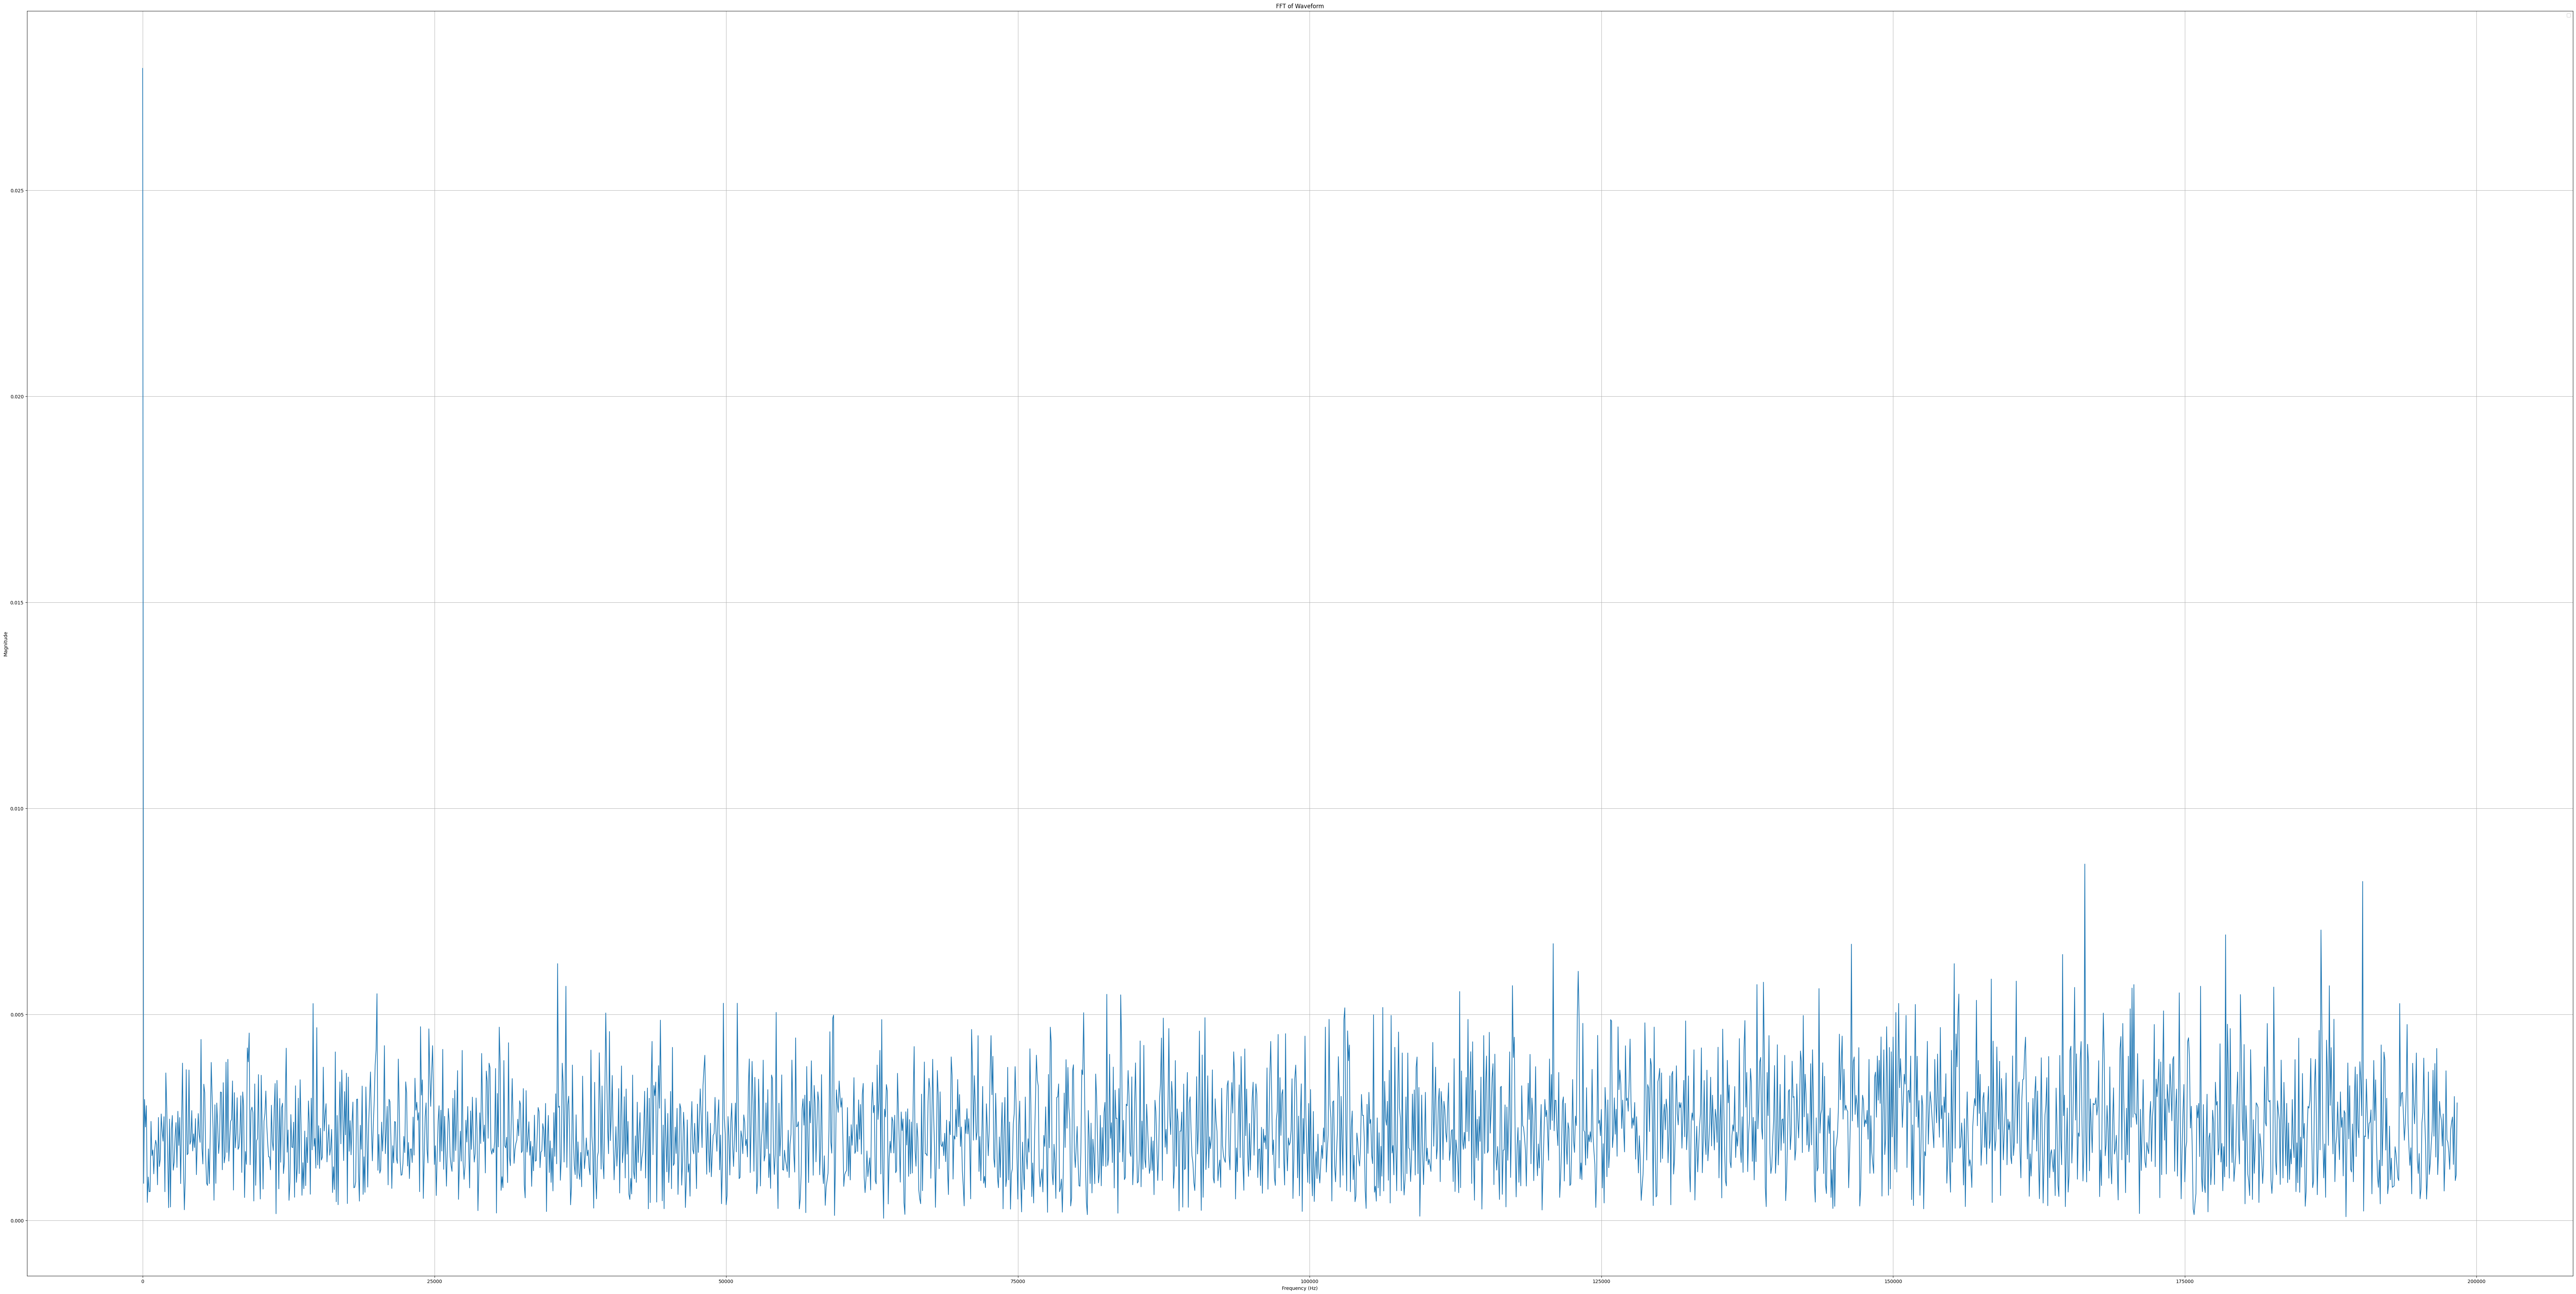

In [18]:
# Perform FFT
N = len(waveform)
yf = np.fft.fft(waveform)
# Create frequency axis (only plot positive frequencies)
xf = np.fft.fftfreq(N, 1/fs)[:N//2]
# Calculate magnitude spectrum (only use positive frequencies)
magnitude = 2.0/N * np.abs(yf[:N//2])

# Plot the frequency spectrum
plt.figure(figsize=(96, 48))
plt.plot(xf, magnitude)
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Waveform')

# Set reasonable x-axis limits

# max_freq_to_show = min(100000, max(xf))  # Show up to 100 kHz or max frequency
# plt.xlim(0, cutoff_freq)

# Add vertical line at 20kHz (the low-pass filter cutoff frequency)
# plt.axvline(x=cutoff_freq, color='r', linestyle='--')
plt.legend()

plt.show()